### Your Name Here:  Sheraz Choudhary
### Your TF Name:  Joe Palin
### Graduate or Undergraduate Credit:  Graduate

# Image Exif Data Analyzer

In [64]:
import pandas as pd
import numpy as np
import os, sys
import PIL.Image
from PIL import Image
import PIL.ExifTags
from PIL.ExifTags import TAGS, GPSTAGS 

## Set Arguments for the images to be scanned:

In [2]:
#directory to scan 
directory="C:/Users/shera/Pictures/2018"
incl_ext=('JPG', 'jpg', 'JPEG', 'jpeg', 'TIFF', 'tiff', 'PNG', 'png')  # files to include in file scan

## Define Functions to Scan Directory and Extract EXIF:

In [3]:
def exif_to_df(path):
    """
    Given the full path to an image this function extracts the Exif labels and values of the image.  
    A pandas dataframe is returned with the labels as column names.
    """
    img = Image.open(path)  #open picture at input path 
    
    try:
        imgExif = {TAGS[label]: value  #list comprehension to create dictionary of Exif label in PIL.ExifTags
                   for label, value in img._getexif().items()
                   if label in TAGS}
    except:  #if there is no Exif data return none
        return None
    
    imgExif.pop('MakerNote', None)  #remove MakerNote because it differ with each camera and data format is proprietary
    imgExif.pop('UserComment', None)  #this field in the exif is not used and contains dummy data

    imgExif['ImagePath'] = path
    
    imgExifDf = pd.DataFrame([imgExif])  #convert dictionary to dataframe (https://stackoverflow.com/questions/18837262/convert-python-dict-into-a-dataframe)
    
    return imgExifDf

In [4]:
def scan_exif(dir):
    """
    Scans all files in the input directory (valid path to folder in string format).
    The path of the file is used to call the exif_to_df function to get a dataframe with the Exif values.
    """
    all_df = pd.DataFrame()  #this df will hold all image df (complication is that each image df can have some diff and some same columns)

    for path, dirs, files in os.walk(dir, topdown=True):  #https://gist.github.com/Grimthorr/8ea07f43cebeb4156e54   #https://www.tutorialspoint.com/python/os_walk.htm   #https://stackoverflow.com/questions/30444105/better-way-to-find-absolute-paths-during-os-walk
        for file in files:
            if file.endswith(incl_ext):  #only include file types with exif data (specified as tuple below import statements)
                pathfile=os.path.join(os.path.abspath(path), file)  #absolute path and filename concatenated  #https://stackoverflow.com/questions/30444105/better-way-to-find-absolute-paths-during-os-walk   #https://docs.python.org/2/library/stat.html and https://docs.python.org/3/library/os.html
                img_df = exif_to_df(pathfile)
                all_df = all_df.append(img_df, ignore_index=True)  #append image df to all_df (https://stackoverflow.com/questions/43720337/pandatables-and-exif-adding-columns-as-needed)

    return all_df

## Call Functions to create Exif Dataframe and CSV:

In [5]:
# Read all images in directory, create exif dataframe, write to csv file
# Takes around 7-10 min to scan a directory with 13000 images (create backup_df incase corrupt exif_df during cleaning)
exif_df = scan_exif(directory)
exif_df.to_csv('exif_file.csv')

# # code used during testing:
# backup_df = scan_exif(directory)
# exif_df = backup_df
# exif_df.to_csv('exif_file.csv')
# exif_df = backup_df.copy()

In [6]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 1000)
display (exif_df.shape)
exif_df.head()

(13212, 75)

ApertureValue Artist BitsPerSample BodySerialNumber BrightnessValue  \
0           NaN    NaN           NaN              NaN             NaN   
1           NaN    NaN           NaN              NaN    (1984, 2560)   
2           NaN    NaN           NaN              NaN    (1984, 2560)   
3           NaN    NaN           NaN              NaN    (1984, 2560)   
4           NaN    NaN           NaN              NaN    (1834, 2560)   

  CameraOwnerName  ColorSpace ComponentsConfiguration CompressedBitsPerPixel  \
0             NaN         1.0                     NaN                    NaN   
1             NaN         1.0     b'\x01\x02\x03\x00'                 (5, 1)   
2             NaN         1.0     b'\x01\x02\x03\x00'                 (5, 1)   
3             NaN         1.0     b'\x01\x02\x03\x00'                 (5, 1)   
4             NaN         1.0     b'\x01\x02\x03\x00'                 (5, 1)   

   Contrast Copyright  CustomRendered             DateTime  \
0       NaN       NaN             NaN                  NaN   
1       0.0       NaN             0.0  2017:12:30 14:46:47   
2       0.0       NaN             0.0  2017:12:30 14:46:47   
3       0.0       NaN             0.0  2017:12:30 14:46:49   
4       0.0       NaN             0.0  2017:12:30 14:46:53   

     DateTimeDigitized     DateTimeOriginal DigitalZoomRatio  ExifImageHeight  \
0                  NaN  2017:08:19 21:20:08              NaN           1535.0   
1  2017:12:30 14:46:47  2017:12:30 14:46:47         (16, 16)           3648.0   
2  2017:12:30 14:46:47  2017:12:30 14:46:47         (16, 16)           3648.0   
3  2017:12:30 14:46:49  2017:12:30 14:46:49         (16, 16)           3648.0   
4  2017:12:30 14:46:53  2017:12:30 14:46:53         (16, 16)           3648.0   

   ExifImageWidth  ExifInteroperabilityOffset  ExifOffset ExifVersion  \
0          2046.0                       250.0          86     b'0220'   
1          5472.0                     34230.0         290     b'0230'   
2          5472.0                     34230.0         290     b'0230'   
3          5472.0                     34230.0         290     b'0230'   
4          5472.0                     34230.0         290     b'0230'   

  ExposureBiasValue  ExposureMode  ExposureProgram ExposureTime   FNumber  \
0               NaN           NaN              NaN          NaN       NaN   
1           (3, 10)           0.0              2.0     (1, 125)  (28, 10)   
2           (3, 10)           0.0              2.0     (1, 125)  (28, 10)   
3           (3, 10)           0.0              2.0     (1, 125)  (28, 10)   
4           (3, 10)           0.0              2.0     (1, 125)  (28, 10)   

  FileSource  Flash FlashPixVersion        FocalLength  FocalLengthIn35mmFilm  \
0        NaN    NaN             NaN  (6737101, 262144)                    NaN   
1    b'\x03'   16.0         b'0100'        (1410, 100)                   38.0   
2    b'\x03'   16.0         b'0100'        (1410, 100)                   38.0   
3    b'\x03'   16.0         b'0100'        (1410, 100)                   38.0   
4    b'\x03'   16.0         b'0100'        (1510, 100)                   41.0   

   FocalPlaneResolutionUnit FocalPlaneXResolution FocalPlaneYResolution  \
0                       NaN                   NaN                   NaN   
1                       NaN                   NaN                   NaN   
2                       NaN                   NaN                   NaN   
3                       NaN                   NaN                   NaN   
4                       NaN                   NaN                   NaN   

  GPSInfo  ISOSpeedRatings                 ImageDescription  ImageLength  \
0     NaN              NaN                              NaN          NaN   
1     NaN           4000.0                                           NaN   
2     NaN           4000.0                                           NaN   
3     NaN           4000.0                                           NaN   
4 

## Let the Data Cleanup Begin

### Research columns and then remove all that deemed unnecessary

In [7]:
exif_df = exif_df.drop(['ApertureValue', 'Artist', 'BitsPerSample', 'BodySerialNumber', 'CameraOwnerName', 'ColorSpace', 
                        'ComponentsConfiguration', 'CompressedBitsPerPixel', 'Contrast', 'Copyright', 'CustomRendered', 
                        'DigitalZoomRatio', 'ExifImageHeight', 'ExifImageWidth', 'ExifInteroperabilityOffset', 'ExifOffset', 
                        'ExifVersion', 'FileSource', 'FlashPixVersion', 'FocalPlaneResolutionUnit', 'FocalPlaneXResolution', 
                        'FocalPlaneYResolution', 'GPSInfo', 'ImageDescription', 'ImageLength', 'ImageUniqueID', 'ImageWidth', 
                        'LensMake', 'LensModel', 'LensSerialNumber', 'LightSource', 'LensSpecification', 'MaxApertureValue', 
                        'Orientation', 'PhotometricInterpretation', 'PrintImageMatching', 'ProcessingSoftware', 
                        'ResolutionUnit', 'SamplesPerPixel', 'Saturation', 'SceneCaptureType', 'SceneType', 'SensingMethod', 
                        'Sharpness', 'ShutterSpeedValue', 'SubjectLocation', 'SubsecTime', 'SubsecTimeDigitized', 
                        'SubsecTimeOriginal', 'XResolution', 'YCbCrPositioning', 'YResolution'], axis=1)

### Fill some missing values, simplify values and delete rows not needed

In [8]:
# Remove row where 'Model' is null or iPhone
print("Before:", exif_df.shape)
exif_df = exif_df.dropna(subset=['Model'])
exif_df = exif_df[exif_df['Make'] != 'Apple']
print("After:", exif_df.shape)

Before: (13212, 23)
After: (13194, 23)


In [9]:
# create mask for canon and replace nulls in 'FocalLengthIn35mmFilm' with appropriate values
canon_mask = exif_df['Model'].str.contains('Canon')

exif_df['FocalLengthIn35mmFilm'][canon_mask] = exif_df['FocalLength']  # canon is a 35mm camera so these are equivalent

In [10]:
# clean-up df rows from externally modified sources using the 'Software' column
print("Before:", exif_df.shape)
exif_df['Software'] = exif_df['Software'].replace(np.nan, 'Unknown')  # Canon does not populate 'Software'
exif_df = exif_df[exif_df['Software'].str.contains('Picasa') == False]
exif_df = exif_df[exif_df['Software'].str.contains('Adobe ') == False]
exif_df = exif_df[exif_df['Software'].str.contains('Windows ') == False]
exif_df = exif_df[exif_df['Software'].str.contains('marlin') == False]
print("After:", exif_df.shape)

Before: (13194, 23)
After: (12630, 23)


In [11]:
# Simplify flash values to 0 or 1 based on if the flash fired or not
flash_y_mask = exif_df['Flash'].isin([9, 13, 15])
flash_n_mask = exif_df['Flash'] == 16

exif_df['Flash'][flash_y_mask] = 1  # 9,13,15 all mean flash fired
exif_df['Flash'][flash_n_mask] = 0  # 16 means flash did not fire

C:\Users\shera\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
# create masks for filenames (filenames roughly correlate with picture content--estimate 90% correctly labeled)
baby_some_mask = exif_df['ImagePath'].str.contains('Zak')
baby_all_mask = exif_df['ImagePath'].str.contains('ZAK')
copy_mask = exif_df['ImagePath'].str.contains('Copy')
random_mask = exif_df['ImagePath'].str.contains('Random')

exif_df['Subject'] = np.nan

exif_df['Subject'][baby_some_mask] = 'SomeBaby'
exif_df['Subject'][baby_all_mask] = 'AllBaby'
exif_df['Subject'][copy_mask] = 'Copy'
exif_df['Subject'][random_mask] = 'Random'
exif_df['Subject'] = exif_df['Subject'].replace(np.nan, 'Misc')

C:\Users\shera\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\shera\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\shera\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\sh

### Convert tuples to decimal and calculate APEX values

In [13]:
def val_to_num (val):
    if isinstance(val, tuple):  #convert only tuples  (eg. (280, 100) will be converted to 2.8)
        decimal = val[0]/val[1]
        return round(decimal, 5)
    else:
        return val

In [14]:
# convert all tuple entries to decimal floats
exif_df = exif_df.applymap(lambda val: val_to_num(val))

In [15]:
import math

def apex_vals(fnum, shutter, iso):
    av = round(math.log(fnum**2, 2), 3)
    tv = round(math.log(1/shutter, 2), 3)
    sv = round(math.log((iso/3.125), 2), 3)
    ev = round(av + tv, 3)
    bv = round(ev - sv, 3)
    return (av, tv, sv, bv)


def exposure_val(fnum, shutter, iso):
    ev = math.log((fnum**2 / shutter), 2)
    ev_iso = ev - math.log((iso/100), 2)
    ev_iso = round(ev_iso, 3)
    return ev_iso


def dof_val(fnum, focal, focal35):
    
    c = 0.03 * (focal / focal35)  # calculate circle of confusion based on 0.03 for 35mm sensor
        
    # estimate subject distance based on focallength35
    # custom formula to make nexus distance 1 meter and Canon at 200 distance around 3 meters
    s = focal35 * 2.7196 * (1/c**.5)
    
    h = (focal**2/(fnum*c)) + focal
    dn = (s*(h - focal)) / (h + s - 2*focal)
    df = (s*(h - focal)) / (h - s)
    dof = (df - dn) / 1000  # all units were in mm so convert to meters 
    return dof
   
    
# Test functions to calculate av, tv, sv, bv, ev
print("Ev:", exposure_val(2.8, 0.008, 1600))
print("Av, Tv, Sv, Bv:", apex_vals(2.8, 0.008, 1600))
print("dof:", dof_val(2, 4.6, 26))

Ev: 5.937
Av, Tv, Sv, Bv: (2.971, 6.966, 9.0, 0.937)
dof: 1.2293720572071598


In [16]:
# convert exposure values to APEX system 
# eg. f2.8 lets in 2x the light of 4.0 and 4x the light of 5.6 (in APEX 2.8, 4.0, 5.6 correspond to 3, 4, 5)
exif_df['Av'] = exif_df.apply(lambda row: apex_vals(row['FNumber'], row['ExposureTime'], row['ISOSpeedRatings'])[0], axis=1)
exif_df['Tv'] = exif_df.apply(lambda row: apex_vals(row['FNumber'], row['ExposureTime'], row['ISOSpeedRatings'])[1], axis=1)
exif_df['Sv'] = exif_df.apply(lambda row: apex_vals(row['FNumber'], row['ExposureTime'], row['ISOSpeedRatings'])[2], axis=1)
exif_df['Bv'] = exif_df.apply(lambda row: apex_vals(row['FNumber'], row['ExposureTime'], row['ISOSpeedRatings'])[3], axis=1)

In [17]:
# add calculated dof to the dataframe
exif_df['Dof'] = exif_df.apply(lambda row: dof_val(row['FNumber'], row['FocalLength'], row['FocalLengthIn35mmFilm']), axis=1)

### Bin the data and create new feature columns

In [18]:
exif_df['DateTime'] = pd.to_datetime(exif_df['DateTime'], format='%Y:%m:%d %H:%M:%S') #2018:03:01 07:30:17

In [19]:
# Create bins based on hour of day (code modified from Lecture 11 code)
# exif_df['Hour'] = exif_df['DateTime'].apply(lambda x: round(x.hour+(x.minute/60),1))  #if want more precise hour
exif_df['Hour'] = exif_df['DateTime'].apply(lambda x: x.hour)  #if want more precise hour

hr_bins = [-1, 7, 9, 17, 19, 23]
bin_names = ['LateNight', 'Morning', 'Daytime', 'Evening', 'Night']  # text-based bins
# bin_names = [4, 0, 1, 2, 3]  # numerical bins

exif_df['TimeBin'] = pd.cut(exif_df['Hour'], bins=hr_bins, labels=bin_names)
exif_df['TimeBin'] = exif_df['TimeBin'].astype('str')  # convert from category to str so LabelEncoder can be used
# exif_df['TimeBin'] = pd.to_numeric(exif_df['TimeBin'])  # comment out if using text-based bins

In [20]:
# Create bins based on hour of day (code modified from Lecture 11 code)
bv_bins = [-15, -5, 0, 5, 9, 15]
bv_bin_names = ['Dim Indoor', 'Indoor', 'Dusk', 'Weak Sun', 'Strong Sun']  # text-based bins
# bin_names = [0, 1, 2, 3, 4]  # numerical bins

exif_df['BrightnessBin'] = pd.cut(exif_df['Bv'], bins=bv_bins, labels=bv_bin_names)
exif_df['BrightnessBin'] = exif_df['BrightnessBin'].astype('str')  # convert from category to str so LabelEncoder can be used

flash_y_mask = exif_df['Flash'] == 1
exif_df['BrightnessBin'][flash_y_mask] = 'Flash'  # override brightness bin if flash was used
# exif_df['TimeBin'] = pd.to_numeric(exif_df['TimeBin'])  # comment out if using text-based bins

C:\Users\shera\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


### Label Encoding for Text columns

In [21]:
# code adapted from Lecture 9 code
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# instantiate the encoder
labels = LabelEncoder()

# fit label encoder to text columns
labels_subject = labels.fit_transform(exif_df['Subject'])
labels_model = labels.fit_transform(exif_df['Model'])
labels_timebin = labels.fit_transform(exif_df['TimeBin'])
labels_bvbin = labels.fit_transform(exif_df['BrightnessBin'])

# add the columns with out of labelencoder fit 
exif_df['Subject_L'] = labels_subject
exif_df['Model_L'] = labels_model
exif_df['TimeBin_L'] = labels_timebin
exif_df['BrightnessBin_L'] = labels_bvbin

### Remove additional columns no longer need and reorder the columns

In [22]:
exif_df = exif_df.drop(['BrightnessValue', 'DateTimeDigitized', 'DateTimeOriginal', 'ExposureMode', 'FocalLength', 'Make', 
                        'MeteringMode', 'Software', 'SubjectDistance', 'SubjectDistanceRange', 'WhiteBalance'], axis=1)

In [23]:
exif_df = exif_df[['Subject', 'Subject_L', 'ImagePath', 'DateTime', 'Hour', 'TimeBin', 'TimeBin_L', 'Model', 'Model_L', 
                   'FocalLengthIn35mmFilm', 'ExposureProgram', 'ExposureBiasValue', 'Flash', 'Dof','FNumber', 'Av', 
                   'ExposureTime', 'Tv', 'ISOSpeedRatings', 'Sv', 'Bv', 'BrightnessBin', 'BrightnessBin_L']]

In [24]:
exif_verbose_df = exif_df.copy()

In [25]:
exif_df = exif_df.drop(['FNumber', 'ExposureTime', 'ISOSpeedRatings'], axis=1)

### Finally, remove any remaining nulls and test shape of df
#### From starting shape of (13166, 75) to cleaned shape of (12571, 11)

In [26]:
exif_df = exif_df.dropna()
exif_verbose_df = exif_verbose_df.dropna()

In [27]:
exif_df.isna().any()

Subject                  False
Subject_L                False
ImagePath                False
DateTime                 False
Hour                     False
TimeBin                  False
TimeBin_L                False
Model                    False
Model_L                  False
FocalLengthIn35mmFilm    False
ExposureProgram          False
ExposureBiasValue        False
Flash                    False
Dof                      False
Av                       False
Tv                       False
Sv                       False
Bv                       False
BrightnessBin            False
BrightnessBin_L          False
dtype: bool

In [28]:
exif_df.dtypes

Subject                          object
Subject_L                         int64
ImagePath                        object
DateTime                 datetime64[ns]
Hour                            float64
TimeBin                          object
TimeBin_L                         int64
Model                            object
Model_L                           int64
FocalLengthIn35mmFilm           float64
ExposureProgram                 float64
ExposureBiasValue               float64
Flash                           float64
Dof                             float64
Av                              float64
Tv                              float64
Sv                              float64
Bv                              float64
BrightnessBin                    object
BrightnessBin_L                   int64
dtype: object

In [29]:
exif_df = exif_df.reset_index(drop=True)

In [30]:
print("Shape of Cleaned Df:", exif_df.shape)
display(exif_df.tail())

Shape of Cleaned Df: (12616, 20)


Subject  Subject_L                                          ImagePath  \
12611  Random          3  C:\Users\shera\Pictures\2018\999999-Random\180...   
12612  Random          3  C:\Users\shera\Pictures\2018\999999-Random\180...   
12613  Random          3  C:\Users\shera\Pictures\2018\999999-Random\180...   
12614  Random          3  C:\Users\shera\Pictures\2018\999999-Random\180...   
12615  Random          3  C:\Users\shera\Pictures\2018\999999-Random\180...   

                 DateTime  Hour  TimeBin  TimeBin_L         Model  Model_L  \
12611 2018-04-28 10:37:56  10.0  Daytime          0      Pixel XL        2   
12612 2018-04-28 12:03:27  12.0  Daytime          0      Pixel XL        2   
12613 2018-04-29 14:02:20  14.0  Daytime          0  Canon EOS 6D        0   
12614 2018-04-29 15:06:54  15.0  Daytime          0      Pixel XL        2   
12615 2018-04-29 15:07:05  15.0  Daytime          0      Pixel XL        2   

       FocalLengthIn35mmFilm  ExposureProgram  ExposureBiasValue  Flash  \
12611                   26.0              2.0            0.00000    0.0   
12612                   26.0              2.0            0.00000    0.0   
12613                   84.0              2.0            0.66667    1.0   
12614                   26.0              2.0            0.00000    0.0   
12615                   26.0              2.0            0.00000    0.0   

            Dof   Av      Tv     Sv     Bv BrightnessBin  BrightnessBin_L  
12611  1.176592  2.0  10.727  4.000  8.727      Weak Sun                5  
12612  1.176592  2.0   9.400  4.000  7.400      Weak Sun                5  
12613  0.055426  4.0   5.907  7.000  2.907         Flash                2  
12614  1.176592  2.0  12.086  4.986  9.100    Strong Sun                4  
12615  1.176592  2.0  12.025  4.163  9.862    Strong Sun                4

In [31]:
exif_verbose_df.to_csv('exif_cleaned.csv')

## Let the Analysis Begin 
### (no kidding about 70% of time being spent on cleanup)

In [32]:
exif_df.corr()

Subject_L      Hour  TimeBin_L   Model_L  \
Subject_L               1.000000  0.138458  -0.088869  0.147181   
Hour                    0.138458  1.000000  -0.109333 -0.272586   
TimeBin_L              -0.088869 -0.109333   1.000000  0.025781   
Model_L                 0.147181 -0.272586   0.025781  1.000000   
FocalLengthIn35mmFilm  -0.256539  0.127160  -0.087849 -0.790205   
ExposureProgram        -0.015235 -0.009561  -0.015981 -0.052002   
ExposureBiasValue      -0.144721  0.232577  -0.029968 -0.806654   
Flash                  -0.143930  0.173850  -0.046293 -0.489260   
Dof                     0.057260 -0.101463  -0.042907  0.445900   
Av                     -0.143387  0.122478  -0.139662 -0.789533   
Tv                      0.100450 -0.250555  -0.197367 -0.045884   
Sv                     -0.147633  0.366260   0.173138 -0.551639   
Bv                      0.121816 -0.358081  -0.252999  0.197924   
BrightnessBin_L         0.184390  0.168964  -0.020088  0.039091   

                       FocalLengthIn35mmFilm  ExposureProgram  \
Subject_L                          -0.256539        -0.015235   
Hour                                0.127160        -0.009561   
TimeBin_L                          -0.087849        -0.015981   
Model_L                            -0.790205        -0.052002   
FocalLengthIn35mmFilm               1.000000         0.081929   
ExposureProgram                     0.081929         1.000000   
ExposureBiasValue                   0.594621         0.016190   
Flash                               0.562925         0.053219   
Dof                                -0.295731        -0.010409   
Av                                  0.788600         0.074993   
Tv                                  0.052754         0.015175   
Sv                                  0.329691        -0.011513   
Bv                                 -0.031424         0.033344   
BrightnessBin_L                    -0.081852         0.001632   

                       ExposureBiasValue     Flash       Dof        Av  \
Subject_L                      -0.144721 -0.143930  0.057260 -0.143387   
Hour                            0.232577  0.173850 -0.101463  0.122478   
TimeBin_L                      -0.029968 -0.046293 -0.042907 -0.139662   
Model_L                        -0.806654 -0.489260  0.445900 -0.789533   
FocalLengthIn35mmFilm           0.594621  0.562925 -0.295731  0.788600   
ExposureProgram                 0.016190  0.053219 -0.010409  0.074993   
ExposureBiasValue               1.000000  0.341942 -0.382956  0.611385   
Flash                           0.341942  1.000000 -0.150610  0.433673   
Dof                            -0.382956 -0.150610  1.000000 -0.233688   
Av                              0.611385  0.433673 -0.233688  1.000000   
Tv                              0.029009 -0.052237 -0.084069  0.128914   
Sv                              0.557162  0.009980 -0.345801  0.300051   
Bv                             -0.252081  0.070905  0.160054  0.076122   
BrightnessBin_L                -0.056906 -0.082654 -0.019696  0.053087   

                             Tv        Sv        Bv  BrightnessBin_L  
Subject_L              0.100450 -0.147633  0.121816         0.184390  
Hour                  -0.250555  0.366260 -0.358081         0.168964  
TimeBin_L             -0.197367  0.173138 -0.252999        -0.020088  
Model_L               -0.045884 -0.551639  0.197924         0.039091  
FocalLengthIn35mmFilm  0.052754  0.329691 -0.031424        -0.081852  
ExposureProgram        0.015175 -0.011513  0.033344         0.001632  
ExposureBiasValue      0.029009  0.557162 -0.252081        -0.056906  
Flash                 -0.052237  0.009980  0.070905        -0.082654  
Dof                   -0.084069 -0.345801  0.160054        -0.019696  
Av                     0.128914  0.300051  0.076122         0.053087  
Tv                     1.000000 -0.374526  0.774477         0.154170  
Sv                    -0.374526  1.000000 -0.840914         0.008416  
Bv     

In [33]:
exif_df.describe()

Subject_L          Hour     TimeBin_L       Model_L  \
count  12616.000000  12616.000000  12616.000000  12616.000000   
mean       1.420736     14.946814      0.944673      1.305644   
std        1.787629      3.866083      1.257097      0.578066   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000     12.000000      0.000000      1.000000   
50%        0.000000     16.000000      0.000000      1.000000   
75%        4.000000     18.000000      1.000000      2.000000   
max        4.000000     23.000000      4.000000      2.000000   

       FocalLengthIn35mmFilm  ExposureProgram  ExposureBiasValue  \
count           12616.000000     12616.000000       12616.000000   
mean               50.434052         2.001823           0.208870   
std                32.513889         0.066004           0.199988   
min                24.000000         1.000000           0.000000   
25%                26.000000         2.000000           0.000000   
50%                39.000000         2.000000           0.300000   
75%                70.000000         2.000000           0.300000   
max               200.000000         4.000000           1.300000   

              Flash           Dof            Av            Tv            Sv  \
count  12616.000000  12616.000000  12616.000000  12616.000000  12616.000000   
mean       0.117866      0.760051      2.628456      6.346547      8.216722   
std        0.322462      1.347618      0.670207      1.324523      2.084761   
min        0.000000      0.055406      1.696000      1.000000      4.000000   
25%        0.000000      0.305049      2.000000      5.322000      6.824000   
50%        0.000000      0.305282      2.971000      6.322000      8.322000   
75%        0.000000      1.176592      2.971000      6.966000     10.000000   
max        1.000000     10.890400      5.656000     16.610000     13.000000   

                 Bv  BrightnessBin_L  
count  12616.000000     12616.000000  
mean       0.758281         2.275761  
std        2.829936         1.219593  
min       -7.626000         0.000000  
25%       -1.255500         1.000000  
50%        0.610000         2.000000  
75%        2.000000         3.000000  
max       11.910000         5.000000

### Visualize the data

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

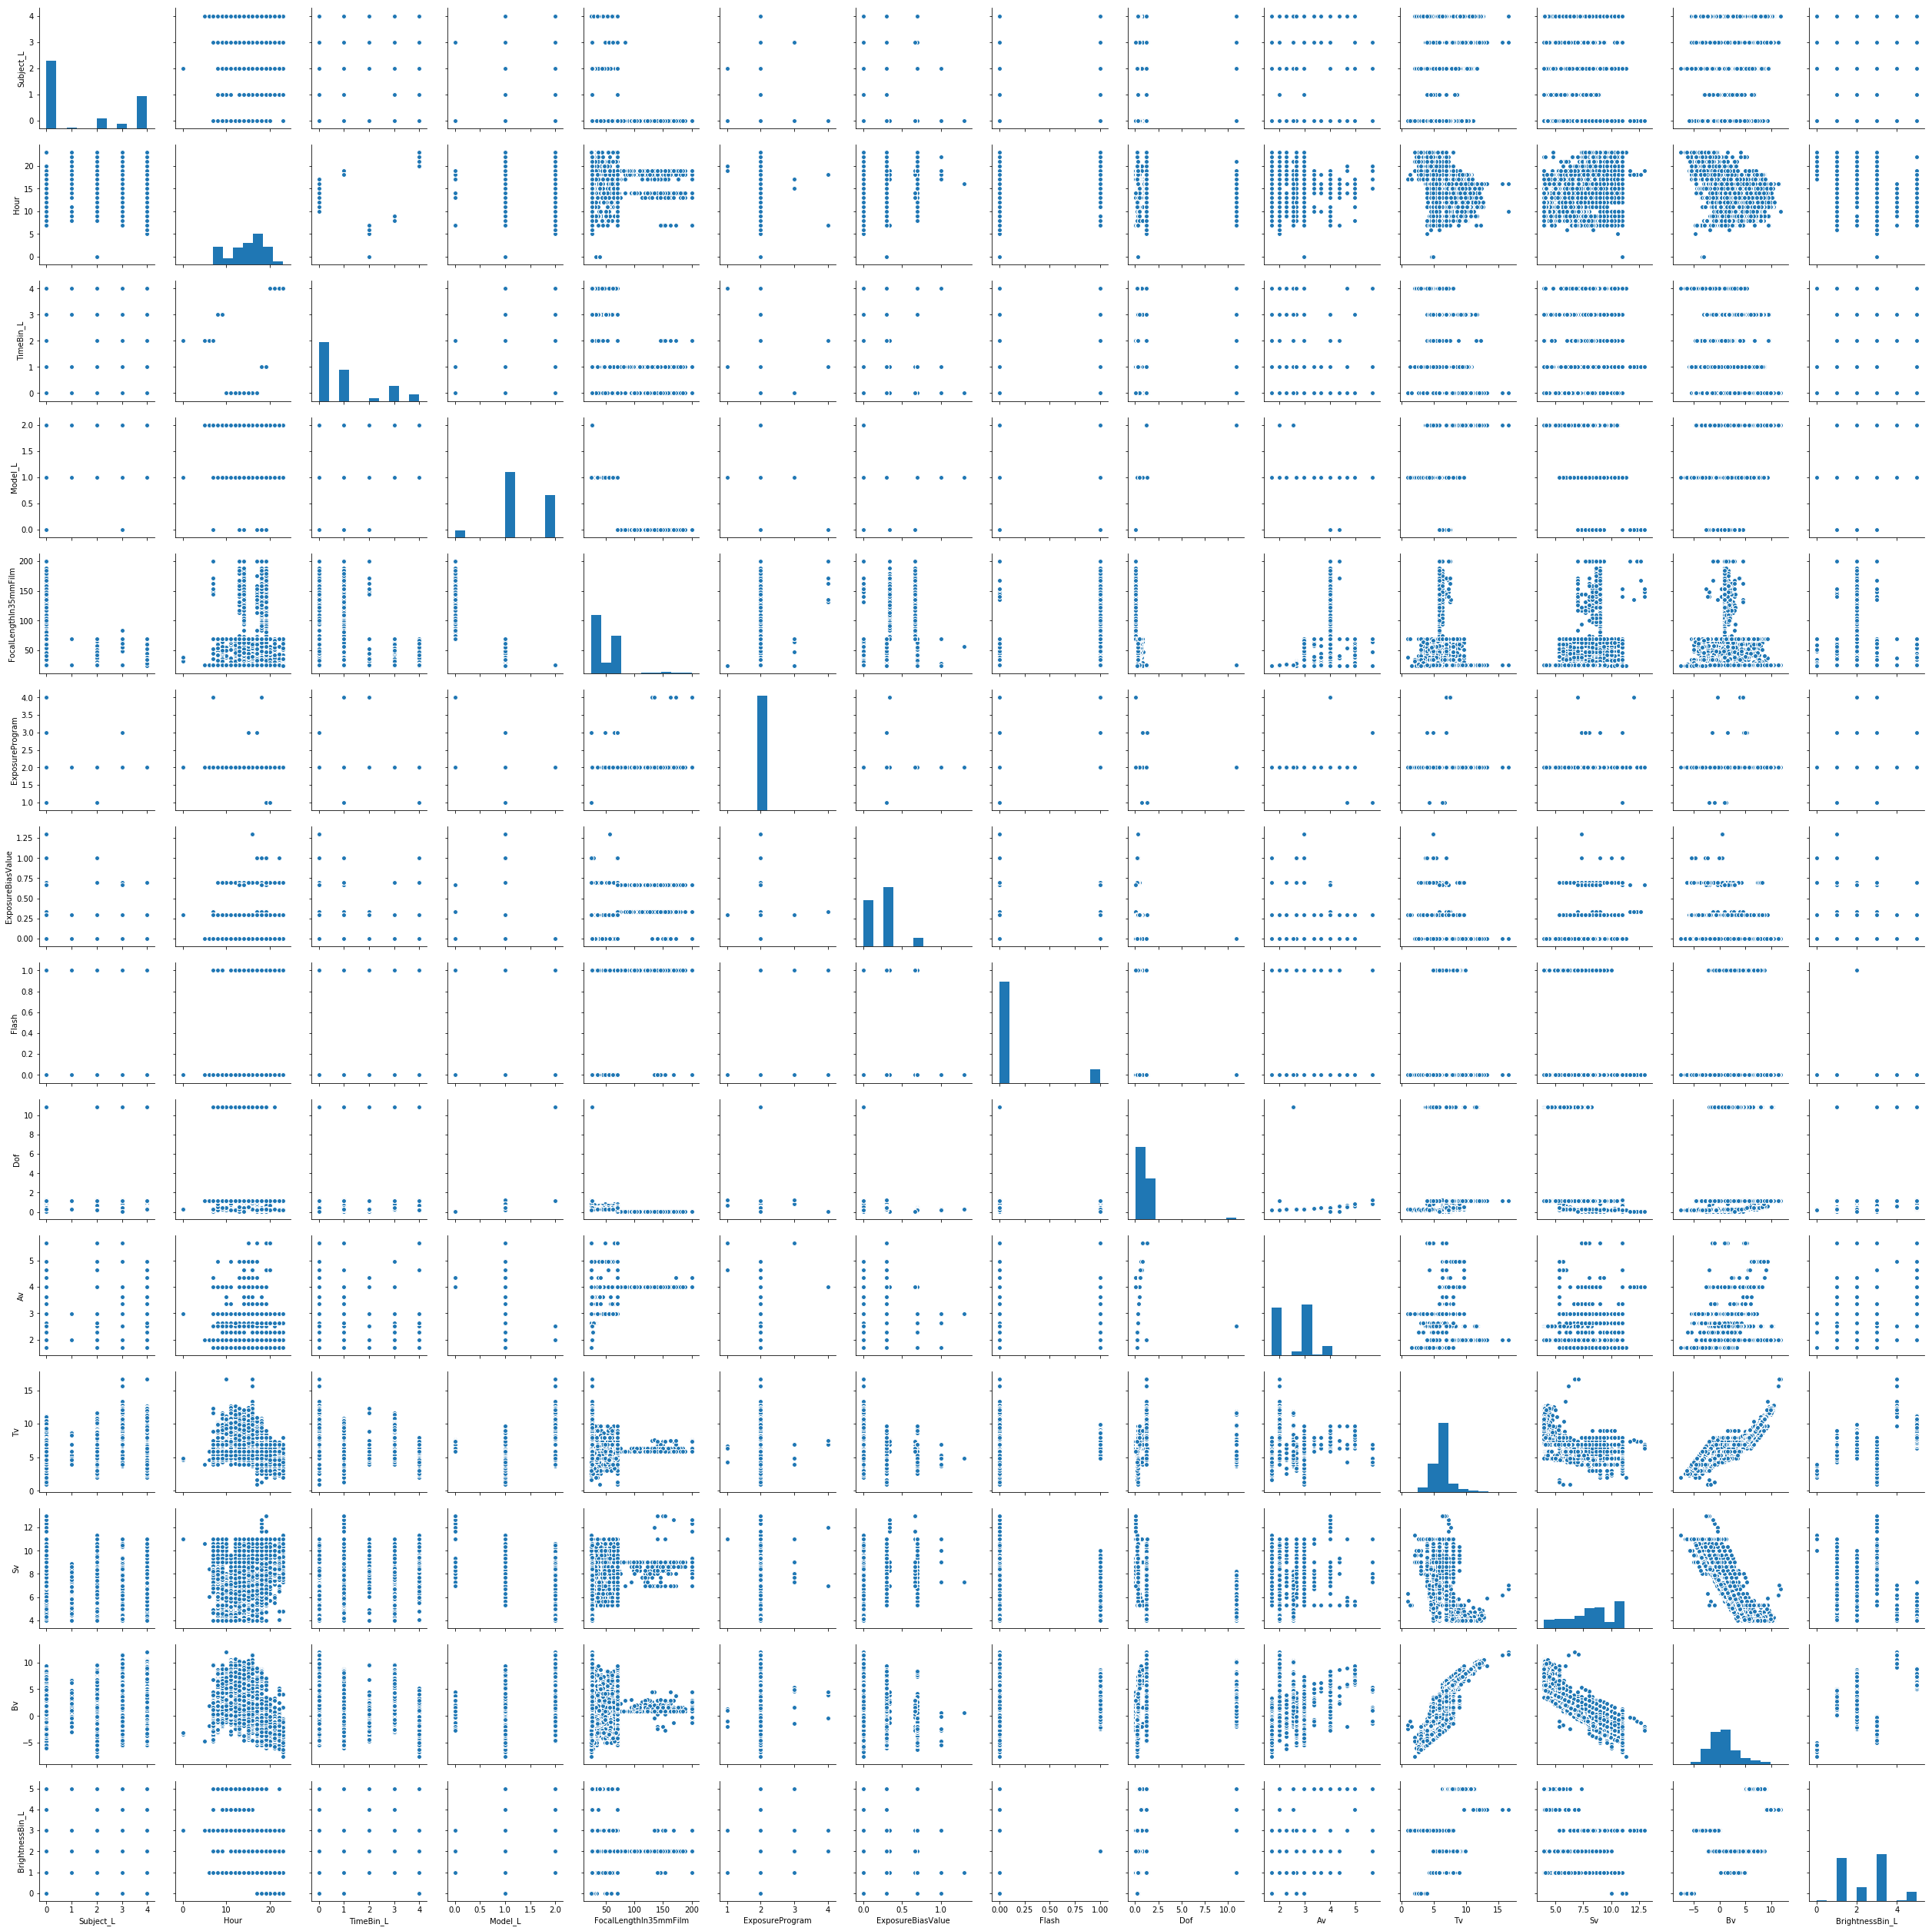

In [35]:
graph = sns.pairplot(exif_df)
graph.savefig('exif_sns.png')
plt.show()

In [36]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import cufflinks as cf
cf.go_offline() #from Lecture 4 (otherwise causes user authentication error)

In [37]:
#load the data
byHour = exif_verbose_df['ImagePath'].groupby(exif_verbose_df['Hour']).count()

#Got syntax for cufflinks from: https://plot.ly/ipython-notebooks/cufflinks/
byHour.iplot(kind='bar', 
             xTitle='Hour of Day', 
             yTitle="Number of Photos", 
             title='Number of Photos by Hour of Day', 
             filename='hour_graph')

In [38]:
#load the data
byModel = exif_verbose_df['ImagePath'].groupby(exif_verbose_df['Model']).count()

#Got syntax for cufflinks from: https://plot.ly/ipython-notebooks/cufflinks/
byModel.iplot(kind='bar', 
             xTitle='Camera Model', 
             yTitle="Number of Photos", 
             title='Number of Photos by Camera Model', 
             filename='camera_graph')

In [39]:
#load the data
bySubject = exif_verbose_df['ImagePath'].groupby(exif_verbose_df['Subject']).count()

#Got syntax for cufflinks from: https://plot.ly/ipython-notebooks/cufflinks/
bySubject.iplot(kind='bar', 
             xTitle='Subject', 
             yTitle="Number of Photos", 
             title='Number of Photos by Subject', 
             filename='subject_graph')

In [40]:
#load the data
byFocal = exif_verbose_df['ImagePath'].groupby(exif_verbose_df['FocalLengthIn35mmFilm']).count()

#Got syntax for cufflinks from: https://plot.ly/ipython-notebooks/cufflinks/
byFocal.iplot(kind='bar', 
             xTitle='35mm Focal Length', 
             yTitle="Number of Photos", 
             title='Number of Photos by Focal Length', 
             filename='focal_graph')

In [41]:
#load the data
byAperture = exif_verbose_df['ImagePath'].groupby(exif_verbose_df['FNumber']).count()

#Got syntax for cufflinks from: https://plot.ly/ipython-notebooks/cufflinks/
byAperture.iplot(kind='bar', 
             xTitle='Aperture', 
             yTitle="Number of Photos", 
             title='Number of Photos by Aperture', 
             filename='aperture_graph')

In [42]:
#load the data
byShutter = exif_verbose_df['ImagePath'].groupby(exif_verbose_df['ExposureTime']).count()

#Got syntax for cufflinks from: https://plot.ly/ipython-notebooks/cufflinks/
byShutter.iplot(kind='bar', 
             xTitle='Shutter', 
             yTitle="Number of Photos", 
             title='Number of Photos by Shutter', 
             filename='shutter_graph')

In [43]:
#load the data
byISO = exif_verbose_df['ImagePath'].groupby(exif_verbose_df['ISOSpeedRatings']).count()

#Got syntax for cufflinks from: https://plot.ly/ipython-notebooks/cufflinks/
byISO.iplot(kind='bar', 
             xTitle='ISO Speed', 
             yTitle="Number of Photos", 
             title='Number of Photos by ISO Speed', 
             filename='iso_graph')

In [44]:
#load the data
byBrightness = exif_verbose_df['ImagePath'].groupby(exif_verbose_df['BrightnessBin']).count()

#Got syntax for cufflinks from: https://plot.ly/ipython-notebooks/cufflinks/
byBrightness.iplot(kind='bar', 
             xTitle='Brightness', 
             yTitle="Number of Photos", 
             title='Number of Photos by Brightness', 
             filename='brightness_graph')

In [45]:
#load the data
byExposureBias = exif_verbose_df['ImagePath'].groupby(exif_verbose_df['ExposureBiasValue']).count()

#Got syntax for cufflinks from: https://plot.ly/ipython-notebooks/cufflinks/
byExposureBias.iplot(kind='bar', 
             xTitle='Exposure Bias', 
             yTitle="Number of Photos", 
             title='Number of Photos by Exposure Bias', 
             filename='exposurebias_graph')

### Specify features and targets then split into training and testing dfs 

In [47]:
from sklearn.model_selection import train_test_split

X = exif_df[['Hour', 'TimeBin_L', 'Model_L', 'FocalLengthIn35mmFilm', 'ExposureProgram', 'ExposureBiasValue', 'Flash', 
            'Dof', 'Av', 'Tv', 'Sv', 'Bv', 'BrightnessBin_L']]
y = exif_df['Subject']

# all = exif_df[['Subject_L', 'Hour', 'TimeBin_L', 'Model_L', 'FocalLengthIn35mmFilm', 'ExposureProgram', 'ExposureBiasValue', 
#                'Flash', 'Dof', 'Av', 'Tv', 'Sv', 'Bv', 'BrightnessBin_L']]

display(X.head(3))
display(y.head(3))

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=81, stratify=y)

Hour  TimeBin_L  Model_L  FocalLengthIn35mmFilm  ExposureProgram  \
0  14.0          0        1                   38.0              2.0   
1  14.0          0        1                   38.0              2.0   
2  14.0          0        1                   38.0              2.0   

   ExposureBiasValue  Flash       Dof     Av     Tv      Sv     Bv  \
0                0.3    0.0  0.303455  2.971  6.966  10.322 -0.385   
1                0.3    0.0  0.303455  2.971  6.966  10.322 -0.385   
2                0.3    0.0  0.303455  2.971  6.966  10.322 -0.385   

   BrightnessBin_L  
0                3  
1                3  
2                3

0    AllBaby
1    AllBaby
2    AllBaby
Name: Subject, dtype: object

### Let's try some models

#### Decision Tree

In [48]:
from IPython.display import display, Image
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import pydotplus

tree_clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=275, random_state=81)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=275, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=81,
            splitter='best')

In [49]:
# Decided to use a decision tree
# 0.8 is the best score with an overfitted tree but pruning it to a more manageable level
tree_clf.score(X_test,y_test)

0.673430564362714

In [50]:
tree_confusion_matrix = confusion_matrix(y_test, tree_clf.predict(X_test))
print(tree_confusion_matrix)
#sns.heatmap(tree_confusion_matrix)

[[1779    0   11    0   65]
 [  23    0    2    0    0]
 [  93    0  120    0   47]
 [  73    0   18    0   30]
 [ 627    0   41    0  225]]


In [51]:
print(classification_report(y_test, tree_clf.predict(X_test)))  # does not display properly with display()

             precision    recall  f1-score   support

    AllBaby       0.69      0.96      0.80      1855
       Copy       0.00      0.00      0.00        25
       Misc       0.62      0.46      0.53       260
     Random       0.00      0.00      0.00       121
   SomeBaby       0.61      0.25      0.36       893

avg / total       0.63      0.67      0.62      3154



C:\Users\shera\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



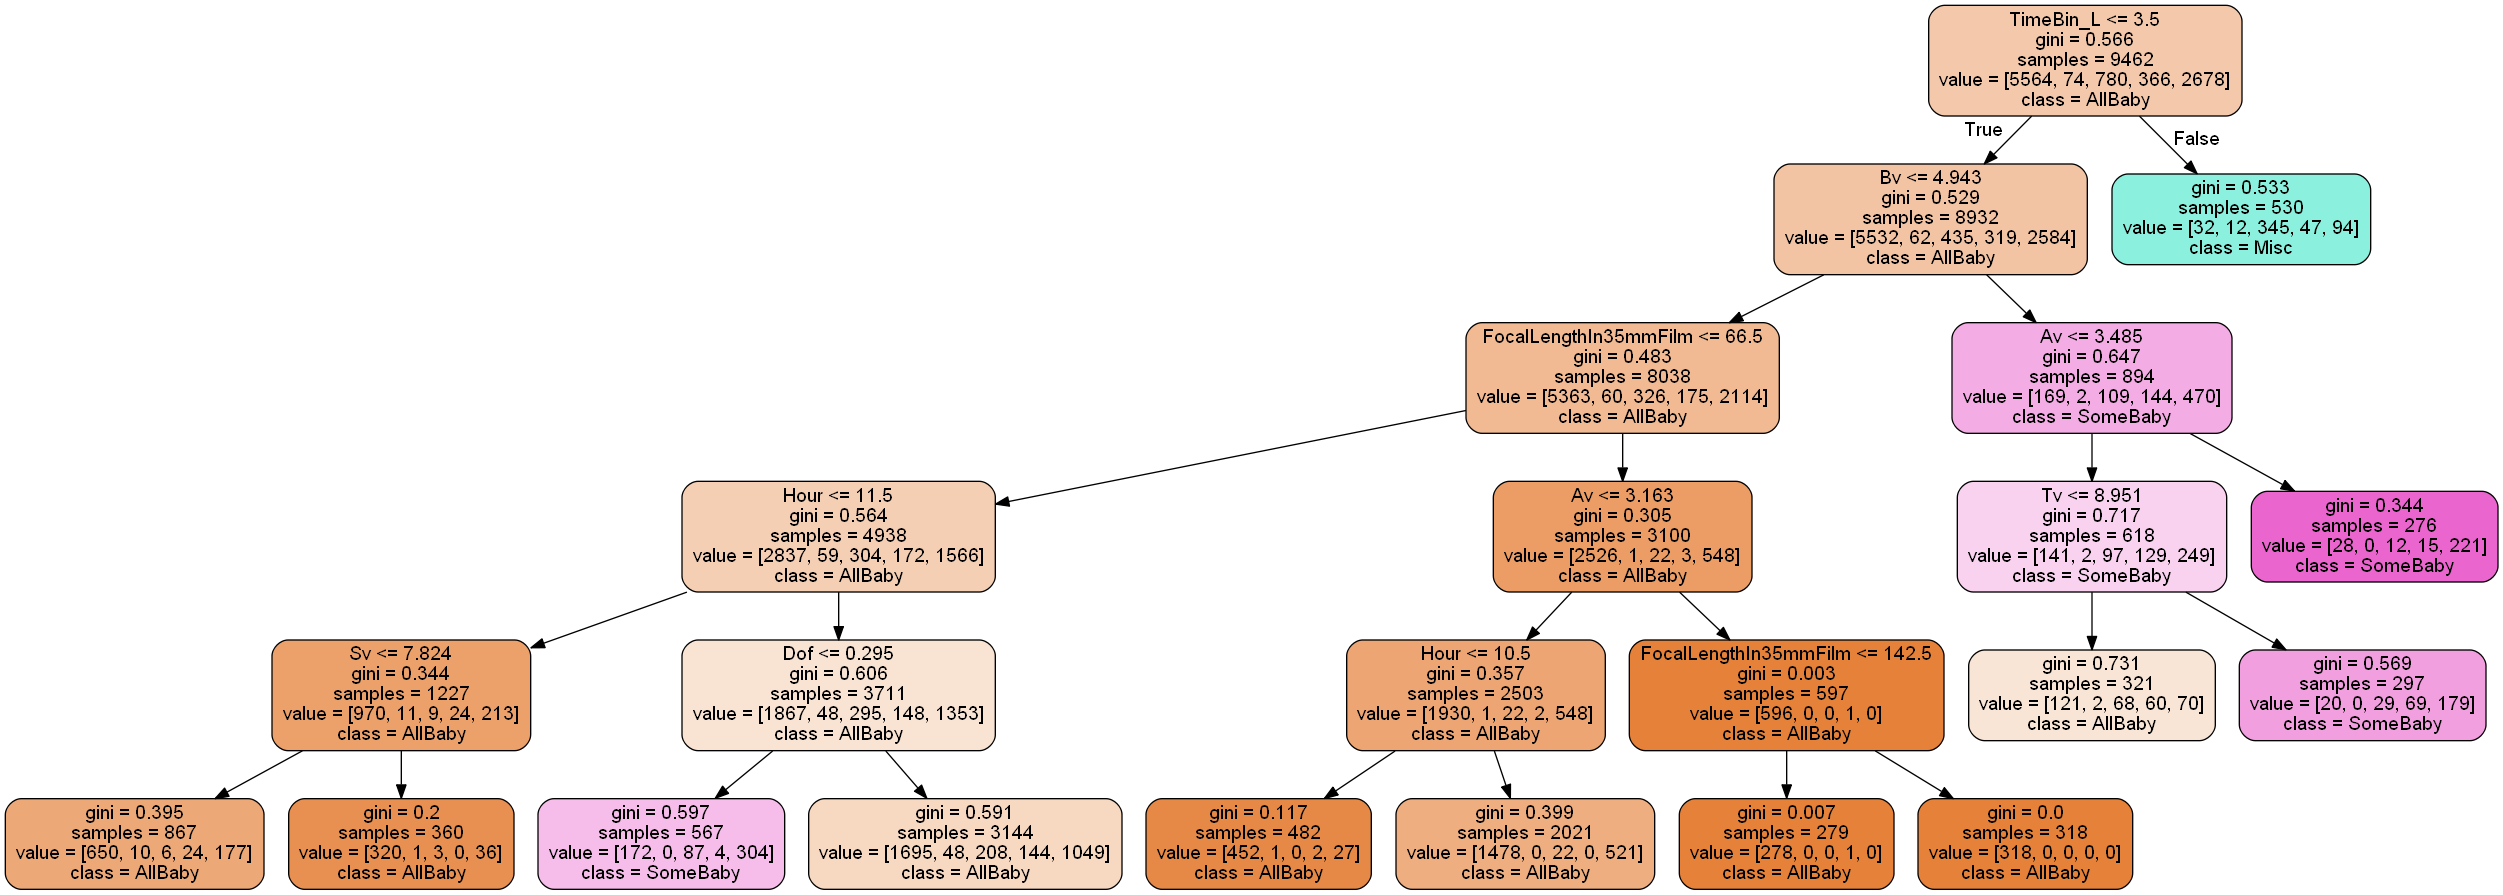

In [52]:
# Visualize the decision tree (not that great because everyone is predicted to be normal)
features = list(X.columns)
labels = ['AllBaby', 'Copy', 'Misc', 'Random', 'SomeBaby']

with open("exif_tree.dot", 'w') as f:
    f = tree.export_graphviz(tree_clf, feature_names=features, class_names=labels, filled=True, rounded=True, out_file=f)
graph = pydotplus.graph_from_dot_data(open('exif_tree.dot').read()) 
Image(graph.create_png())

In [53]:
subject_tree_predict = tree_clf.predict(X)
exif_df['TreePredict'] = subject_tree_predict
exif_df = exif_df[['TreePredict', 'Subject', 'Subject_L', 'ImagePath', 'DateTime', 'Hour', 'TimeBin', 'TimeBin_L', 'Model', 
                   'Model_L', 'FocalLengthIn35mmFilm', 'ExposureProgram', 'ExposureBiasValue', 'Flash', 'Dof', 'Av', 'Tv', 
                   'Sv', 'Bv', 'BrightnessBin', 'BrightnessBin_L']]

In [54]:
pd.options.display.max_colwidth = 500  # display full image path
exif_df[exif_df['Subject']=='SomeBaby'].tail(500)

TreePredict   Subject  Subject_L  \
11447    SomeBaby  SomeBaby          4   
11448    SomeBaby  SomeBaby          4   
11449    SomeBaby  SomeBaby          4   
11450    SomeBaby  SomeBaby          4   
11451     AllBaby  SomeBaby          4   
11452     AllBaby  SomeBaby          4   
11453     AllBaby  SomeBaby          4   
11454     AllBaby  SomeBaby          4   
11455     AllBaby  SomeBaby          4   
11456     AllBaby  SomeBaby          4   
11457     AllBaby  SomeBaby          4   
11458     AllBaby  SomeBaby          4   
11459    SomeBaby  SomeBaby          4   
11460    SomeBaby  SomeBaby          4   
11461    SomeBaby  SomeBaby          4   
11462     AllBaby  SomeBaby          4   
11463     AllBaby  SomeBaby          4   
11464     AllBaby  SomeBaby          4   
11465     AllBaby  SomeBaby          4   
11466     AllBaby  SomeBaby          4   
11467     AllBaby  SomeBaby          4   
11468     AllBaby  SomeBaby          4   
11469     AllBaby  SomeBaby          4   
11470     AllBaby  SomeBaby          4   
11471     AllBaby  SomeBaby          4   
11472     AllBaby  SomeBaby          4   
11473     AllBaby  SomeBaby          4   
11474     AllBaby  SomeBaby          4   
11475     AllBaby  SomeBaby          4   
11476     AllBaby  SomeBaby          4   
11477     AllBaby  SomeBaby          4   
11478     AllBaby  SomeBaby          4   
11479    SomeBaby  SomeBaby          4   
11480    SomeBaby  SomeBaby          4   
11497     AllBaby  SomeBaby          4   
11498     AllBaby  SomeBaby          4   
11499    SomeBaby  SomeBaby          4   
11500     AllBaby  SomeBaby          4   
11501     AllBaby  SomeBaby          4   
11502     AllBaby  SomeBaby          4   
11503     AllBaby  SomeBaby          4   
11504     AllBaby  SomeBaby          4   
11505     AllBaby  SomeBaby          4   
11506    SomeBaby  SomeBaby          4   
11507    SomeBaby  SomeBaby          4   
11508    SomeBaby  SomeBaby          4   
11509     AllBaby  SomeBaby          4   
11510     AllBaby  SomeBaby          4   
11511     AllBaby  SomeBaby          4   
11512     AllBaby  SomeBaby          4   
11513     AllBaby  SomeBaby          4   
11514     AllBaby  SomeBaby          4   
11515     AllBaby  SomeBaby          4   
11516    SomeBaby  SomeBaby          4   
11517    SomeBaby  SomeBaby          4   
11518     AllBaby  SomeBaby          4   
11519     AllBaby  SomeBaby          4   
11520     AllBaby  SomeBaby          4   
11521     AllBaby  SomeBaby          4   
11522     AllBaby  SomeBaby          4   
11523     AllBaby  SomeBaby          4   
11524     AllBaby  SomeBaby          4   
11525     AllBaby  SomeBaby          4   
11526     AllBaby  SomeBaby          4   
11527     AllBaby  SomeBaby          4   
11528     AllBaby  SomeBaby          4   
11529    SomeBaby  SomeBaby          4   
11530    SomeBaby  SomeBaby          4   
11531    SomeBaby  SomeBaby          4   
11532    SomeBaby  SomeBaby          4   
11533    SomeBaby  SomeBaby          4   
11534    SomeBaby  SomeBaby          4   
11535     AllBaby  SomeBaby          4   
11536     AllBaby  SomeBaby          4   
11537     AllBaby  SomeBaby          4   
11538     AllBaby  SomeBaby          4   
11539     AllBaby  SomeBaby          4   
11540     AllBaby  SomeBaby          4   
11541     AllBaby  SomeBaby          4   
11542     AllBaby  SomeBaby          4   
11543     AllBaby  SomeBaby          4   
11544     AllBaby  SomeBaby          4   
11545     AllBaby  SomeBaby          4   
11546     AllBaby  SomeBaby          4   
11547     AllBaby  SomeBaby          4   
11548     AllBaby  SomeBaby          4   
11549     AllBaby  SomeBaby          4   
11550     AllBaby  SomeBaby          4   
11551     AllBaby  SomeBaby          4   
11552     AllBaby  SomeBaby          4   
11553     AllBaby  SomeBaby          4   
11554     AllBaby  SomeBaby          4   
11555     AllBaby  SomeBaby          4   
11556     AllBaby  SomeBaby          4   
11557     AllBab

In [55]:
exif_df.to_csv('exif_predicted.csv')

## Yay, we found a cute baby amongst the 'SomeBaby' label!!!

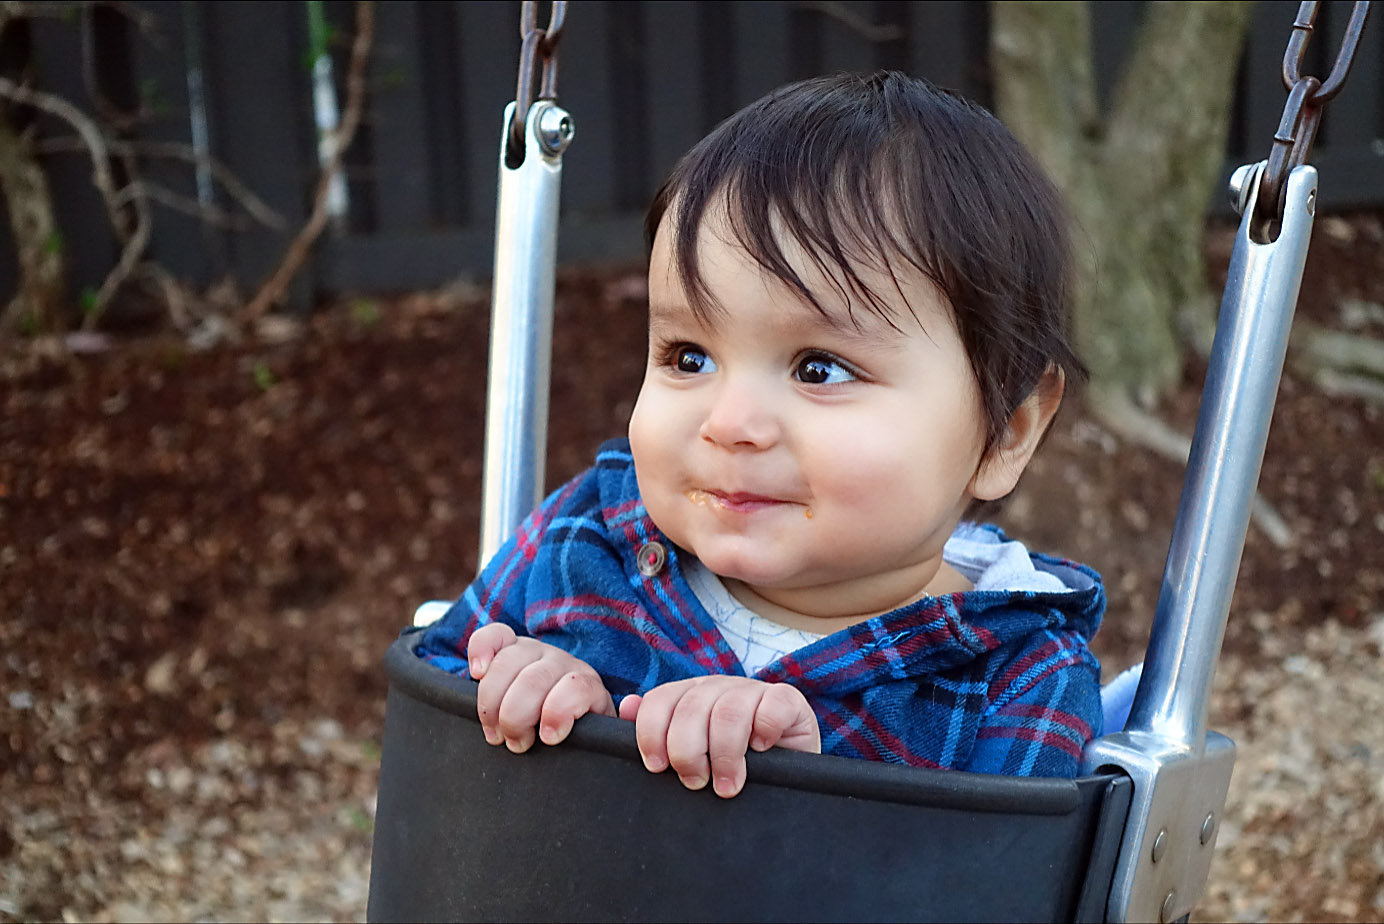

In [65]:
# using a smaller version to prevent huge notebook size
path_to_file = 'C:\\Users\\shera\\Pictures\\2018\\180426-Tot-Lot-ZAK\\180426-185843s.jpg'
baby_img = Image.open(path_to_file)  # use the image library to open file
baby_img

### Other models Tested

#### Perceptron

In [56]:
# Perceptron does a pretty good job but decision tree is the best

from sklearn.linear_model import Perceptron

perceptron = Perceptron(fit_intercept=False)
perceptron.fit(X_train,y_train)

subject_perceptron_predict = perceptron.predict(X_test)

print(accuracy_score(y_test, subject_perceptron_predict))
print()
print(confusion_matrix(y_test, subject_perceptron_predict))
print()
print(classification_report(y_test, subject_perceptron_predict))

0.6296766011414078

[[1580    0    9    0  266]
 [  17    0    2    0    6]
 [  86    0   95    0   79]
 [  46    0   16    0   59]
 [ 551    0   31    0  311]]

             precision    recall  f1-score   support

    AllBaby       0.69      0.85      0.76      1855
       Copy       0.00      0.00      0.00        25
       Misc       0.62      0.37      0.46       260
     Random       0.00      0.00      0.00       121
   SomeBaby       0.43      0.35      0.39       893

avg / total       0.58      0.63      0.60      3154



C:\Users\shera\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning:

max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.

C:\Users\shera\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



#### Naive Bayes Classification

In [57]:
# Gives a pretty poor result

from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(X_train,y_train)

subject_gausian_predict = gaussian.predict(X_test)

print(accuracy_score(y_test, subject_gausian_predict))
print()
print(confusion_matrix(y_test, subject_gausian_predict))
print()
print(classification_report(y_test, subject_gausian_predict))

0.32593532022828153

[[337 551   1  11 955]
 [  1  23   0   1   0]
 [  6  64  94  17  79]
 [  0  59   6  42  14]
 [ 48 229  26  58 532]]

             precision    recall  f1-score   support

    AllBaby       0.86      0.18      0.30      1855
       Copy       0.02      0.92      0.05        25
       Misc       0.74      0.36      0.49       260
     Random       0.33      0.35      0.34       121
   SomeBaby       0.34      0.60      0.43       893

avg / total       0.67      0.33      0.35      3154



#### Kmeans

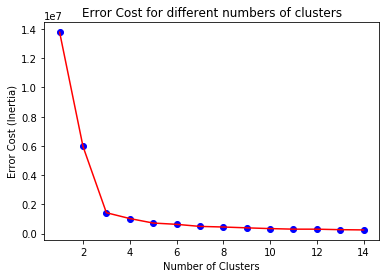

In [58]:
# Kmeans confirms that there are 3 clusters (copy and random are not adding anything to the models)

from sklearn.cluster import MiniBatchKMeans

error_costs = []
clusters = range(1,15)  # range of number of clusters to try

for i in clusters:
    kmeansmb_model = MiniBatchKMeans(n_clusters=i)  # i clusters
    kmeansmb = kmeansmb_model.fit(X)
    error_costs.append(kmeansmb.inertia_)

plt.scatter(clusters, error_costs, c = "blue")
plt.plot(clusters, error_costs, c = "red")
plt.title("Error Cost for different numbers of clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Error Cost (Inertia)")
plt.show()